In [1]:
"""
@File    :   Figure4
@Author  :   chend
@Contact :   chend@hust.edu.cn
"""
import sys
sys.path.append("../utils")
from utils import *
from scipy import optimize

In [2]:
def fit_line(x, A, B):
    return A * x + B

def ger_d(x, y):
    x0 = np.log10(np.array(x))
    y0 = np.log10(np.array(y))
    A0, B0 = optimize.curve_fit(fit_line, x0, y0)[0]
    print("A = ", A0)
    print("B = ", B0)

    xx0 = np.arange(min(x),max(x), 1e-1)
    yy0 = (10**B0) * xx0 ** A0

    return A0, xx0, yy0

In [3]:
n = [500,700,1000,1400,2000,3100,5000,7000,10000,14000,20000,30000,50000,70000,100000]

ith = [3.5,4.0,5.5,8.5]
nums = 15

### The parameter $m = 5$.

A =  0.46766851619212707
B =  0.4097736155543694
A =  0.4900858624786926
B =  0.4229088669786754
A =  0.4996503086448557
B =  0.4998233918175254
A =  0.5001607102672282
B =  0.554856844920927
A =  0.48528862741803785
B =  0.32030556292341916
A =  0.5070665358616003
B =  0.3348201329412465
A =  0.5160001742462088
B =  0.412609053460734
A =  0.5168200913254205
B =  0.46581188434315984


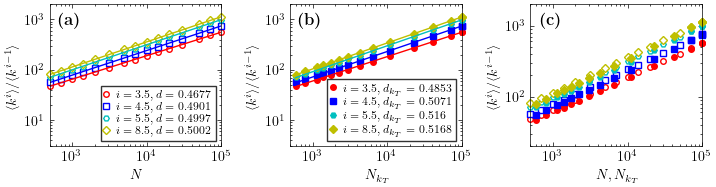

In [4]:
data = np.loadtxt("./m5/ith_moment_BA.dat")
#===============================
y_0 = data[:,1]
y_1 = data[:,2]
y_2 = data[:,3]
y_3 = data[:,4]

A0, x00, y00 = ger_d(n, y_0)
A1, x11, y11 = ger_d(n, y_1)
A2, x22, y22 = ger_d(n, y_2)
A3, x33, y33 = ger_d(n, y_3)


data2 = np.loadtxt("./m5/ith_moment_BA_DTR.dat")
x_00 = data2[:,0]
y_00 = data2[:,1]
y_11 = data2[:,2]
y_22 = data2[:,3]
y_33 = data2[:,4]

A01, xx_00, yy_00 = ger_d(x_00, y_00)
A11, xx_11, yy_11 = ger_d(x_00, y_11)
A21, xx_22, yy_22 = ger_d(x_00, y_22)
A31, xx_33, yy_33 = ger_d(x_00, y_33)

with plt.style.context(['science', 'scatter']):
    fig, axs = plt.subplots(1, 3, figsize=(7.5, 2.0))

    ax = axs[0]
    ax.plot(n, y_0, "ro", markerfacecolor="w", clip_on=False, markersize=4, label = "$i = 3.5, d =$ "+str(round(A0, 4)))
    ax.plot(n, y_1, "bs", markerfacecolor="w", clip_on=False, markersize=4, label = "$i = 4.5, d =$ "+str(round(A1, 4)))
    ax.plot(n, y_2, "cH", markerfacecolor="w", clip_on=False, markersize=4, label = "$i = 5.5, d =$ "+str(round(A2, 4)))
    ax.plot(n, y_3, "yD", markerfacecolor="w", clip_on=False, markersize=4, label = "$i = 8.5, d =$ "+str(round(A3, 4)))
    ax.plot(x00, y00, "r-")
    ax.plot(x11, y11, "b-")
    ax.plot(x22, y22, "c-")
    ax.plot(x33, y33, "y-")
    ax.set_xlim([5e2,1e5])
    ax.set_ylim([3,2e3])
    ax.legend(loc=4, edgecolor = "black", labelspacing=0.2, handlelength=0.2, fontsize=8, frameon=True, fancybox=False)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_title(r'\textbf{(a)}', x = 0.12, y = 0.8)
    ax.set_xlabel(r'$N$')
    ax.set_ylabel(r'$\langle k^i \rangle / \langle k^{i-1} \rangle$')


    ax = axs[1]
    ax.plot(x_00, y_00, "ro", clip_on=False, markersize=4, label = r"$i = 3.5, d_{k_T} =$ "+str(round(A01, 4)))
    ax.plot(x_00, y_11, "bs", clip_on=False, markersize=4, label = r"$i = 4.5, d_{k_T} =$ "+str(round(A11, 4)))
    ax.plot(x_00, y_22, "cH", clip_on=False, markersize=4, label = r"$i = 5.5, d_{k_T} =$ "+str(round(A21, 4)))
    ax.plot(x_00, y_33, "yD", clip_on=False, markersize=4, label = r"$i = 8.5, d_{k_T} =$ "+str(round(A31, 4)))
    ax.plot(xx_00, yy_00, "r-")
    ax.plot(xx_11, yy_11, "b-")
    ax.plot(xx_22, yy_22, "c-")
    ax.plot(xx_33, yy_33, "y-")
    ax.set_xlim([5e2,1e5])
    ax.set_ylim([3,2e3])
    ax.legend(loc=4, edgecolor = "black", labelspacing=0.2, handlelength=0.2, fontsize=8, frameon=True, fancybox=False)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_title(r'\textbf{(b)}', x = 0.12, y = 0.8)
    ax.set_xlabel(r'$N_{k_T}$')
    ax.set_ylabel(r'$\langle k^i \rangle / \langle k^{i-1} \rangle$')


    ax = axs[2]
    ax.plot(n, y_0, "ro", markerfacecolor="w", clip_on=False, markersize=4)
    ax.plot(n, y_1, "bs", markerfacecolor="w", clip_on=False, markersize=4)
    ax.plot(n, y_2, "cH", markerfacecolor="w", clip_on=False, markersize=4)
    ax.plot(n, y_3, "yD", markerfacecolor="w", clip_on=False, markersize=4)
    ax.plot(x_00, y_00, "ro", clip_on=False, markersize=4)
    ax.plot(x_00, y_11, "bs", clip_on=False, markersize=4)
    ax.plot(x_00, y_22, "cH", clip_on=False, markersize=4)
    ax.plot(x_00, y_33, "yD", clip_on=False, markersize=4)
    ax.set_xlim([5e2,1e5])
    ax.set_ylim([20,2e3])
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_title(r'\textbf{(c)}', x = 0.12, y = 0.8)
    ax.set_xlabel(r'$N, N_{k_T}$')
    ax.set_ylabel(r'$\langle k^i \rangle / \langle k^{i-1} \rangle$')     

    plt.subplots_adjust(left=0.1, bottom=0.20, right=0.97, top=0.91, wspace=0.4)
    plt.show()

### The parameter $m = 10$.

A =  0.4592776867132605
B =  0.5636081408337835
A =  0.48455150793392343
B =  0.5614264876173645
A =  0.4961117224181558
B =  0.6341353577697054
A =  0.4973185112739929
B =  0.696510832499921
A =  0.4673212573456635
B =  0.5206459291253852
A =  0.49284095861291644
B =  0.516655339737035
A =  0.5043823458839579
B =  0.5878437750725988
A =  0.5052830097444752
B =  0.6495561672293357


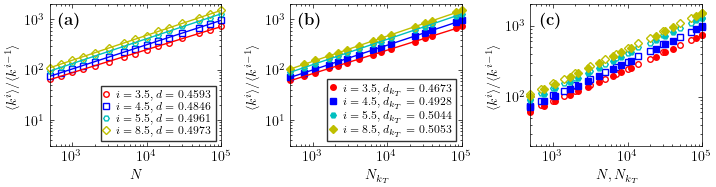

In [5]:
data = np.loadtxt("./m10/ith_moment_BA.dat")
#===============================
y_0 = data[:,1]
y_1 = data[:,2]
y_2 = data[:,3]
y_3 = data[:,4]

A0, x00, y00 = ger_d(n, y_0)
A1, x11, y11 = ger_d(n, y_1)
A2, x22, y22 = ger_d(n, y_2)
A3, x33, y33 = ger_d(n, y_3)

# print(round(A0, 4))


data2 = np.loadtxt("./m10/ith_moment_BA_DTR.dat")
x_00 = data2[:,0]
y_00 = data2[:,1]
y_11 = data2[:,2]
y_22 = data2[:,3]
y_33 = data2[:,4]

A01, xx_00, yy_00 = ger_d(x_00, y_00)
A11, xx_11, yy_11 = ger_d(x_00, y_11)
A21, xx_22, yy_22 = ger_d(x_00, y_22)
A31, xx_33, yy_33 = ger_d(x_00, y_33)

with plt.style.context(['science', 'scatter']):
    fig, axs = plt.subplots(1, 3, figsize=(7.5, 2.0))

    ax = axs[0]
    ax.plot(n, y_0, "ro", markerfacecolor="w", clip_on=False, markersize=4, label = "$i = 3.5, d =$ "+str(round(A0, 4)))
    ax.plot(n, y_1, "bs", markerfacecolor="w", clip_on=False, markersize=4, label = "$i = 4.5, d =$ "+str(round(A1, 4)))
    ax.plot(n, y_2, "cH", markerfacecolor="w", clip_on=False, markersize=4, label = "$i = 5.5, d =$ "+str(round(A2, 4)))
    ax.plot(n, y_3, "yD", markerfacecolor="w", clip_on=False, markersize=4, label = "$i = 8.5, d =$ "+str(round(A3, 4)))
    ax.plot(x00, y00, "r-")
    ax.plot(x11, y11, "b-")
    ax.plot(x22, y22, "c-")
    ax.plot(x33, y33, "y-")
    ax.set_xlim([5e2,1e5])
    ax.set_ylim([3,2e3])
    ax.legend(loc=4, edgecolor = "black", labelspacing=0.2, handlelength=0.2, fontsize=8, frameon=True, fancybox=False)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_title(r'\textbf{(a)}', x = 0.12, y = 0.8)
    ax.set_xlabel(r'$N$')
    ax.set_ylabel(r'$\langle k^i \rangle / \langle k^{i-1} \rangle$')


    ax = axs[1]
    ax.plot(x_00, y_00, "ro", clip_on=False, markersize=4, label = r"$i = 3.5, d_{k_T} =$ "+str(round(A01, 4)))
    ax.plot(x_00, y_11, "bs", clip_on=False, markersize=4, label = r"$i = 4.5, d_{k_T} =$ "+str(round(A11, 4)))
    ax.plot(x_00, y_22, "cH", clip_on=False, markersize=4, label = r"$i = 5.5, d_{k_T} =$ "+str(round(A21, 4)))
    ax.plot(x_00, y_33, "yD", clip_on=False, markersize=4, label = r"$i = 8.5, d_{k_T} =$ "+str(round(A31, 4)))
    ax.plot(xx_00, yy_00, "r-")
    ax.plot(xx_11, yy_11, "b-")
    ax.plot(xx_22, yy_22, "c-")
    ax.plot(xx_33, yy_33, "y-")
    ax.set_xlim([5e2,1e5])
    ax.set_ylim([3,2e3])
    ax.legend(loc=4, edgecolor = "black", labelspacing=0.2, handlelength=0.2, fontsize=8, frameon=True, fancybox=False)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_title(r'\textbf{(b)}', x = 0.12, y = 0.8)
    ax.set_xlabel(r'$N_{k_T}$')
    ax.set_ylabel(r'$\langle k^i \rangle / \langle k^{i-1} \rangle$')


    ax = axs[2]
    ax.plot(n, y_0, "ro", markerfacecolor="w", clip_on=False, markersize=4)
    ax.plot(n, y_1, "bs", markerfacecolor="w", clip_on=False, markersize=4)
    ax.plot(n, y_2, "cH", markerfacecolor="w", clip_on=False, markersize=4)
    ax.plot(n, y_3, "yD", markerfacecolor="w", clip_on=False, markersize=4)
    ax.plot(x_00, y_00, "ro", clip_on=False, markersize=4)
    ax.plot(x_00, y_11, "bs", clip_on=False, markersize=4)
    ax.plot(x_00, y_22, "cH", clip_on=False, markersize=4)
    ax.plot(x_00, y_33, "yD", clip_on=False, markersize=4)
    ax.set_xlim([5e2,1e5])
    ax.set_ylim([20,2e3])
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_title(r'\textbf{(c)}', x = 0.12, y = 0.8)
    ax.set_xlabel(r'$N, N_{k_T}$')
    ax.set_ylabel(r'$\langle k^i \rangle / \langle k^{i-1} \rangle$')     

    plt.subplots_adjust(left=0.1, bottom=0.20, right=0.97, top=0.91, wspace=0.4)
    plt.show()